# Micrograd
Building neural networks from scratch. 

## The Neural Network Data Structure

In [1]:
class Value:

    def __init__(self, data: float) -> None:
        self.data = data

    # if we are printing an object of Value class, it will automatically call this function
    def __repr__(self) -> str:
        return f"Value(data={self.data})"

In [2]:
class Value:

    def __init__(self, data: float, _children=(), _operator='', label='') -> None:
        self.data = data
        self._prev = set(_children)
        self._operator = _operator
        self.label = label

    # if we are printing an object of Value class, 
    # it will automatically call this function
    # similar to toString method in Java
    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other: Value) -> Value:
        out = Value(data=(self.data + other.data), _children=(self, other), _operator='+')
        return out
    
    def __mul__(self, other: Value) -> Value:
        out = Value(data=self.data * other.data, _children=(self, other), _operator='*')
        return out

    # probably not required but added it anyway
    def __sub__(self, other: Value) -> Value:
        out = Value(data=self.data - other.data, _children=(self, other), _operator='-')
        return out
    
    # probably not required but added it anyway
    # truediv is called when we perform a/b
    def __truediv__(self, other: Value) -> Value:
        out = Value(data=self.data / other.data, _children=(self, other), _operator='/')
        return out

In [3]:
a = Value(3.0, label='a')
print(a)

Value(data=3.0)


In [4]:
b = Value(-1.0, label='b')
b

Value(data=-1.0)

In [5]:
a+b

Value(data=2.0)

Internally it performs 
```python
    a.__add__(b)
```

In [6]:
a*b

Value(data=-3.0)

Internally it performs 
```python
    a.__mul__(b)
```

In [7]:
c = Value(20, label='c')

In [8]:
a+b*c

Value(data=-17.0)

**a + b * c** follows BODMAS rule i.e.
- completes b*c first
- adds a to the above result

## After Adding Children & Operator

In [9]:
d = a+b
d.label = 'd'

In [10]:
print("d = ", d)
print("d prev = ", d._prev)
print("d operator = ", d._operator)
print("d label = ", d.label)

d =  Value(data=2.0)
d prev =  {Value(data=-1.0), Value(data=3.0)}
d operator =  +
d label =  d


## Graphing the Neurons

In [11]:
from graphviz import Digraph

# build set of nodes and edges in the graph
def trace(root: Value):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_network(root: Value) -> Digraph:
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # rank direction LR -> left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s | data %.4f | grad }" % (n.label, n.data), shape='record')
        # if the resulting node is result of a mathematical operation:
        if(n._operator):
            # creating an operation node
            dot.node(name=uid+n._operator, label=n._operator)
            # connecting it with the node
            dot.edge(uid + n._operator, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._operator)
    
    return dot

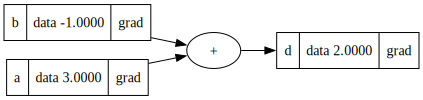

In [12]:
draw_network(d)